In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
df = pd.read_csv("emotion_dataset.csv")

In [11]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [13]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

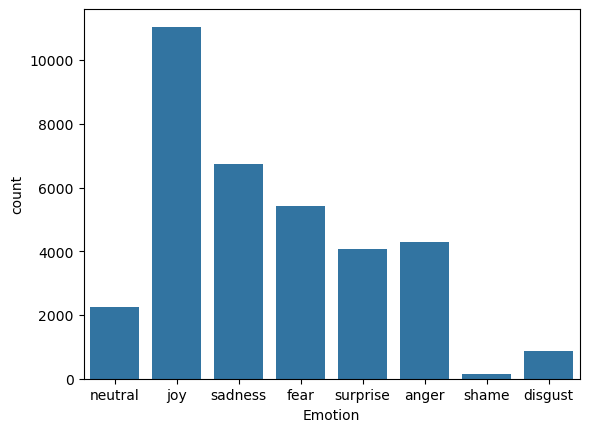

In [15]:
sns.countplot(x='Emotion',data=df)

In [19]:
!pip install neattext


   ---------------------------------------- 0.0/114.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/114.7 kB ? eta -:--:--
   ---------- ----------------------------- 30.7/114.7 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 114.7/114.7 kB 1.3 MB/s eta 0:00:00


In [21]:
import neattext.functions as nfx

# Remove the user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [23]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [25]:
# Remove the stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [27]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [29]:
x = df['Clean_Text']
y = df['Emotion']

In [31]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [35]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6201379574631155

In [38]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.62195822954589

In [40]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [42]:
!pip install gradio


  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached uvicorn-0.34.0-py3-none-any.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/46.9 MB ? eta -:--:--
    --------------------------------------- 1.1/46.9 MB 34.6 MB/s eta 0:00:02
   -- ------------------------------------- 2.5/46.9 MB 31.8 MB/s eta 0:00:02
   --- ------------------------------------ 3.8/46.9 MB 30.3 MB/s eta 0:00:02
   ---- ----------------------------------- 5.2/46.9 MB 30.4 MB/s eta 0:00:02
   ----- ---------------------------------- 6.4/46.9 MB 29.0 MB/s eta 0:00:02
   ------ --------------------------------- 7.7/46.9 MB 28.9 MB/s eta 0:00:02
   ------- -------------------------------- 9.0/46.9 MB 28.8 MB/s eta 0:00:02
   -------- ------------------------------- 10.3/46.9 MB 28.4 MB/s eta 0:00:02
   --------- ------------------------------ 11.5/46.9 MB 28.4 MB/s eta 0:00:02
   ---------- ----------------------------- 12.5/46.9 MB 27.3 MB/s eta 0:00:02
   ----------- 

In [44]:
import gradio as gr

# Prediction function
def predict_emotion(text):
    cleaned = nfx.remove_userhandles(text)
    cleaned = nfx.remove_stopwords(cleaned)
    prediction = pipe_lr.predict([cleaned])[0]  # You can use pipe_lr if preferred
    return prediction

# Create Gradio Interface
interface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Textbox(lines=3, placeholder="Enter a sentence to analyze emotion..."),
    outputs="text",
    title="Emotion Detector",
    description="This app predicts the emotion of a given sentence using a trained ML model."
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
